# PPO in Mountain Car Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import torch.nn as nn

from rlforge.agents.policy_gradient import PPOContinuous
from rlforge.experiments import ExperimentRunner

In [2]:
env = gym.make("Pendulum-v1")

policy_net = nn.Sequential(
    nn.Linear(env.observation_space.shape[0], 64), nn.Tanh(),
    nn.Linear(64,64), nn.Tanh(),
    nn.Linear(64, env.action_space.shape[0])
)
value_net = nn.Sequential(
    nn.Linear(env.observation_space.shape[0], 64), nn.Tanh(),
    nn.Linear(64,64), nn.Tanh(),
    nn.Linear(64, 1)
)

agent = PPOContinuous(
    state_dim=env.observation_space.shape[0],
    action_dim=env.action_space.shape[0],
    policy_net=policy_net,                # nn.Module: outputs mean (B, action_dim)
    value_net=value_net,                 # nn.Module: outputs value (B, 1)
    actor_lr=0.003,
    critic_lr=0.003,
    discount=0.99,            # γ
    gae_lambda=0.95,          # λ for GAE
    clip_epsilon=0.2,
    update_epochs=10,
    mini_batch_size=256,
    rollout_length=4096,
    value_coef=0.5,
    entropy_coeff=0.001,
    max_grad_norm=0.5,
    tanh_squash=True,         # if True: tanh on actions; pass bounds
    action_low=env.action_space.low,           # tensor or float, used if tanh_squash=False
    action_high=env.action_space.high,          # tensor or float, used if tanh_squash=False
    device='cpu'
)

In [6]:
runner = ExperimentRunner(env, agent)

results = runner.run_episodic(
    num_runs=2,
    num_episodes=700,
    max_steps_per_episode=None
)

rewards = results["rewards"]
steps = results['steps']

runner.summary(last_n=20)

 Experiment Summary (Episodic)
Runs: 2
Average runtime per run: 212.614 seconds
Episodes per run: 700
First episode mean reward: -863.115
Last episode mean reward: -186.651
Overall mean reward: -530.989
Mean reward (last 20 episodes): -166.047
First episode mean steps: 200.0
Last episode mean steps: 200.0
Overall mean steps: 200.0


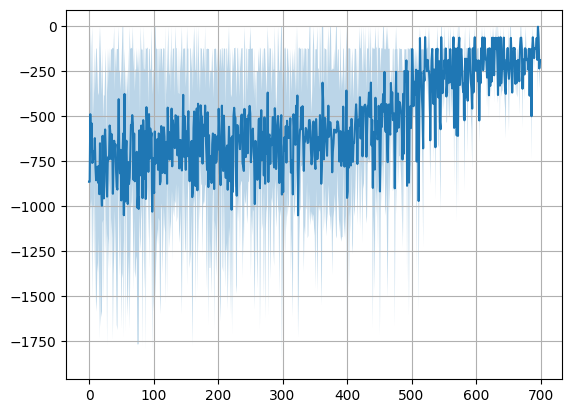

In [7]:
runs_std = np.std(rewards, axis=1)
runs_mean = np.mean(rewards, axis=1)
lower_bound = runs_mean - runs_std
upper_bound = runs_mean + runs_std
plt.plot(runs_mean)
plt.fill_between(np.arange(len(runs_mean)), lower_bound, upper_bound, alpha=0.3)
plt.grid()

In [ ]:
num_envs = 8
envs = gym.make_vec("Pendulum-v1", num_envs=num_envs, vectorization_mode="async")
n = 256

policy_net = nn.Sequential(
    nn.Linear(envs.observation_space.shape[1], n), nn.Tanh(),
    nn.Linear(n,n), nn.Tanh(),
    nn.Linear(n, envs.action_space.shape[1])
)
value_net = nn.Sequential(
    nn.Linear(envs.observation_space.shape[1], n), nn.Tanh(),
    nn.Linear(n,n), nn.Tanh(),
    nn.Linear(n, 1)
)

agent = PPOContinuous(
    state_dim=envs.observation_space.shape[1],
    action_dim=envs.action_space.shape[1],
    policy_net=policy_net,                # nn.Module: outputs mean (B, action_dim)
    value_net=value_net,                 # nn.Module: outputs value (B, 1)
    actor_lr=0.003,
    critic_lr=0.02,
    discount=0.99,            # γ
    gae_lambda=0.95,          # λ for GAE
    clip_epsilon=0.2,
    update_epochs=10,
    mini_batch_size=256,
    rollout_length=4096,
    value_coef=0.5,
    entropy_coeff=0.005,
    max_grad_norm=5,
    tanh_squash=True,         # if True: tanh on actions; pass bounds
    action_low=envs.action_space.low[0],           # tensor or float, used if tanh_squash=False
    action_high=envs.action_space.high[0],          # tensor or float, used if tanh_squash=False
    device='cpu'
)

In [21]:
runner = ExperimentRunner(envs, agent)

results = runner.run_episodic_batch(
    num_runs=1,
    num_episodes=1000,
    max_steps_per_episode=None
)

rewards = results["rewards"]

runner.summary(last_n=20)

Run 1/1 - Episodes:   0%|          | 0/1000 [00:00<?, ?it/s]

 Experiment Summary (Episodic)
Runs: 1
Average runtime per run: 41.037 seconds
Episodes per run: 1000
First episode mean reward: -992.455
Last episode mean reward: -932.775
Overall mean reward: -1336.891
Mean reward (last 20 episodes): -1261.679
First episode mean steps: 200.0
Last episode mean steps: 201.0
Overall mean steps: 201.0


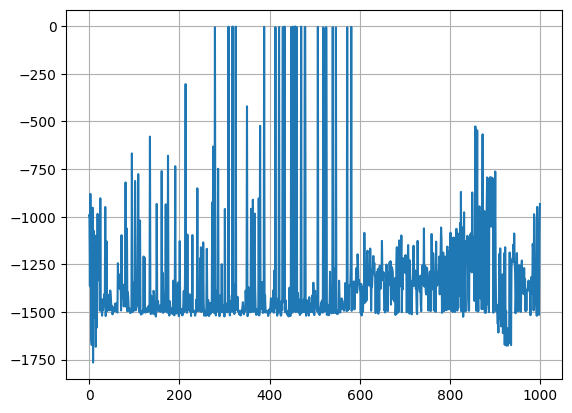

In [22]:
runs_std = np.std(rewards, axis=1)
runs_mean = np.mean(rewards, axis=1)
lower_bound = runs_mean - runs_std
upper_bound = runs_mean + runs_std
plt.plot(runs_mean)
plt.fill_between(np.arange(len(runs_mean)), lower_bound, upper_bound, alpha=0.3)
plt.grid()